In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

## Exploring measurement time and frequency stability

In [ ]:
def display_time_distribution(df, x):
    """ A function that is designed to display the measurement time distribution using a histogram
    Args:
        1) df - a dataframe that contains a column with measurement time data
        2) x - name of measurement time column
    """
    # Plot the measurement time distribution using seaborn's histogram
    plt.figure(figsize=(15, 6))
    sns.histplot(df[x], bins=60, kde=True, color='blue')
    plt.xlabel('Period, s')
    plt.ylabel('Count')
    plt.title('Measurement Time Distribution')

    plt.show()
    
def get_measurement_time_df(df, column_name='time'):
    """ A function for building a dataframe that contains information about the time of measurement of each reading of the device
    Args:
        1) df - a dataframe that contains a time column
        2) column_name - the name of the column containing time data (in seconds)
    Returns:
        time_measurement_df - dataframe that contains information about the time of measurement of each reading of the device
    """
    period_dict = {'start_time': [], 'end_time': [], 'measurement_time': []}
    prev_time = None
    curr_time = None
    for index, row in df.iterrows():
        if(index == len(df)):
            break
            
        prev_time = curr_time
        curr_time = row[column_name]

        if prev_time != None:
            period_dict['start_time'].append(prev_time)
            period_dict['end_time'].append(curr_time)
            period_dict['measurement_time'].append(curr_time - prev_time)
    
    time_measurement_df = pd.DataFrame.from_dict(period_dict)
    return time_measurement_df


def display_time_distribution(df, x):
    """ A function that is designed to display the measurement time distribution using a histogram
    Args:
        1) df - a dataframe that contains a column with measurement time data
        2) x - name of measurement time column
    """
    # Plot the measurement time distribution using seaborn's histogram
    plt.figure(figsize=(25, 6))
    sns.histplot(df[x], bins=60, kde=True, color='blue')
    plt.xlabel('Period, s')
    plt.ylabel('Count')
    plt.title('Measurement Time Distribution')

    plt.show()


def display_data_collection_stability(df):
    """A function that displays the stability of data collection relative to the time when the measurements were taken and 
       relative to the measurement number
    Args:
        1) df - time_measurement_df
    """
    fig, axes = plt.subplots(2, 1, figsize=(15, 14))
    axes[0].plot(range(len(df[df['lost_data'] == 0])), df[df['lost_data'] == 0]['measurement_time'])
    axes[0].set_title(f'Stability of Data Collection (Filtered)\nAverage frequency: {freq:.3f} Hz')
    axes[0].set_xlabel('number of measurement')
    axes[0].set_ylabel('measurement time')
    
    axes[1].plot(df[df['lost_data'] == 0]['start_time'], df[df['lost_data'] == 0]['measurement_time'])
    axes[1].set_title(f'Stability of Data Collection (Filtered)\nAverage frequency: {freq:.3f} Hz')
    axes[1].set_xlabel('time of measurement')
    axes[1].set_ylabel('measurement time')
    
    plt.show()

## Visualizing results

In [ ]:
def display_three_axes(df, y, x=None, title=None, x_label=None, y_label=None, filename=None):
    """ Function for visualization of three axes (X, Y, Z) of the measurement results of the device
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis (for the three lines, this is the same data)
        3) y - the list containing the dataframe column names corresponding to the OX, OY, and OZ axis measurements, respectively
        4) title - title of the graph
        5) x_label - the name of the OX axis of the graph
        6) y_label - the name of the OY axis of the graph
        7) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        Nothing, but plots graph
    """
    plt.figure(figsize=(12, 6))
    if x is None:
        plt.plot(df[y[0]], label='X')
        plt.plot(df[y[1]], label='Y')
        plt.plot(df[y[2]], label='Z')
    else:
        plt.plot(df[x], df[y[0]], label='X')
        plt.plot(df[x], df[y[1]], label='Y')
        plt.plot(df[x], df[y[2]], label='Z')
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## Data Filtering

In [ ]:
def display_raw_filtered_data_zoom(df, x, y, x_lims, y_lims, title=None, x_label=None, y_label=None, filename=None, zoom_axes=None):
    """ Function to display raw and filtered data on the same graph with scaling to better display the filtering
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis of the graph
        3) y - the list containing the column names of the data frame corresponding to the raw and filtered data, respectively, on a given axis (OX, OY, or OZ)
        4) x_lims - the list of limits along the OX axis for zooming ([zoom_xmin; zoom_xmax])
        5) y_lims - the list of limits along the OY axis for zooming ([zoom_ymin; zoom_ymax])
        6) title - title of the graph
        7) x_label - the name of the OX axis of the graph
        8) y_label - the name of the OY axis of the graph
        9) filename - filename under which to save the graph in the project folder
        10) zoom_axes - the list containing the placement coordinates (x, y) and dimensions (width, height) of the smaller graph that contains the zoomed-in image for the specified limits (x_lims and y_lims)
            zoom_axes = [x, y, width, height] 
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # inset
    if zoom_axes:
        inset_ax = fig.add_axes(zoom_axes)
    else:
        inset_ax = fig.add_axes([0.25, 0.20, 0.20, 0.20])
    inset_ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    inset_ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    inset_ax.set_xlim(x_lims[0], x_lims[1])
    inset_ax.set_ylim(y_lims[0], y_lims[1])
    inset_ax.set_title('zoom near origin')
    if filename:
        plt.savefig(f"graphs/{filename}.png", bbox_inches='tight')
    plt.show()

In [ ]:
def get_statistical_measures_df(df, df_data_columns, functions, result_df_columns):
    """A function to create a dataframe that contains calculated statistical parameters for the specified columns of the original dataframe
    Args:
        1) df - the original dataframe that contains the required data
        2) df_data_columns - a list of column names of the original dataframe for which to find statistical measures
        3) functions - a list of references to numpy functions that will calculate the required statistical measures
        4) result_df_columns - a list of names of the columns of the output dataframe, in which the names of the searched statistical measures are specified
    
    An example of using the function:
        Let's imagine that we have a dataframe data_df, which contains the columns 'time' (time of measurement), 'accelX', 'accelY', 'accelZ' (the results of measuring the readings of the accelerometer on the corresponding axes). 
        We want to calculate the statistical mean and standard deviation for the accelerometer readings on all three axes (the columns 'accelX', 'accelY', 'accelZ' of data_df), so the columns of the output dataframe will be named, for example, 'mean' and 'std'. 
        These values ​​can be calculated using the numpy library functions: np.mean and np.std.
        So, the function call will look like this:
        get_statistical_measures_df(df=data_df, 
                                    df_data_columns=['accelX', 'accelY', 'accelZ'], 
                                    functions=[np.mean, np.std], 
                                    result_df_columns=['mean', 'std'])
    """
    statistical_measures_dict = {}
    for key in result_df_columns:
        statistical_measures_dict[key] = []
        
    statistical_measures_dict['data'] = df_data_columns
    
    for [function, res_column] in zip(functions, result_df_columns):
        # Go through all df columns and find statistical measures for it
        for df_data_column in df_data_columns:
            statistical_measures_dict[res_column].append(function(df[df_data_column].values))
    
    # Create DataFrame
    statistical_measures_df = pd.DataFrame.from_dict(statistical_measures_dict)
    statistical_measures_df = statistical_measures_df.set_index('data')
    return statistical_measures_df

## Exploratory Data Analysis

In [ ]:
def display_pie_chart(df, column_name, title=None, filename=None):
    """ Function to display the percentage ratio of column (with the name column_name) content 
    Args:
        1) df - the original dataframe that contains the required information
        2) column_name - the name of the df dataframe column whose percentage values are to be found
        3) title - the title of the graph
        4) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None, but plots graph
    """
    # Calculate the percentage of each activity in original_df
    activity_percentages_df = df[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    plt.pie(activity_percentages_df, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

# Work with train data

In [33]:
df = pd.read_csv('data/40_Hz/concatenated_data/All/Train_activities_1_2023-08-23.csv')
df.head()

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity
0,1692440406933,0.000,0.14895,-0.06000,9.775050,0.106150,-0.018975,-1.117325,No activity
1,1692440406976,0.043,-0.05400,0.04200,9.748950,0.110550,-0.163075,-1.241488,No activity
2,1692440407003,0.070,0.23295,-0.12405,9.739051,0.096937,-0.311437,-1.159812,No activity
3,1692440407037,0.104,-0.18495,-0.01200,9.691051,0.079475,-0.309375,-0.900900,No activity
4,1692440407057,0.124,-0.46305,0.13605,10.146001,0.065037,-0.293013,-0.771787,No activity


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63529 entries, 0 to 63528
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  63529 non-null  int64  
 1   time       63529 non-null  float64
 2   accX       63529 non-null  float64
 3   accY       63529 non-null  float64
 4   accZ       63529 non-null  float64
 5   gyrX       63529 non-null  float64
 6   gyrY       63529 non-null  float64
 7   gyrZ       63529 non-null  float64
 8   activity   63529 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.4+ MB


## Data Cleaning and Preprocessing

### We execute the following steps based on the observation:
- drop null values.
- drop the rows where the time is less than 0.
- sort data in ascending order of time if it has not been sorted.

In [ ]:
df.info()

In [ ]:
len(df[df['time']<0])

In [ ]:
# Check if the 'time' column of the dataframe is sorted in ascending order
df['time'].is_monotonic_increasing

## Exploring measurement period and frequency stability

In [35]:
time_diffs = df['time'].diff()
freq = 1.0 / time_diffs.mean()
print(f"Measurement time = {df.iloc[-1]['time'] - df.iloc[0]['time']} s")
print(f"Number of measurements (number of rows in the data set) = {len(df)}")
print(f"Average measurement period = {time_diffs.mean():.3f} s")
print(f"Average frequency of measurement = {freq:.3f} Hz")

Measurement time = 1852.281 s
Number of measurements (number of rows in the data set) = 63529
Average measurement period = 0.029 s
Average frequency of measurement = 34.297 Hz


In [36]:
time_measurement_df = get_measurement_time_df(df)
time_measurement_df.head()

,start_time,end_time,measurement_time
0,0.000,0.043,0.043
1,0.043,0.070,0.027
2,0.070,0.104,0.034
3,0.104,0.124,0.020
4,0.124,0.150,0.026


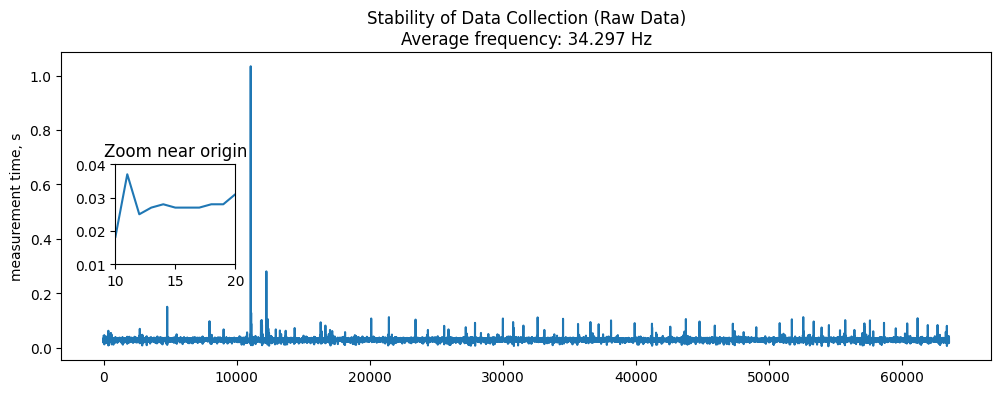

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
ax.set_ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df['measurement_time'])), 
             y=time_measurement_df['measurement_time'])

inset_axes = fig.add_axes([0.17, 0.35, 0.10, 0.25])
inset_axes.plot(range(len(time_measurement_df['measurement_time'])), 
                time_measurement_df['measurement_time'])
inset_axes.set_title('Zoom near origin')
inset_axes.set_xlim(10, 20)
inset_axes.set_ylim(0.01, 0.04)
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

In [38]:
time_measurement_df[time_measurement_df['measurement_time'] > 1]

,start_time,end_time,measurement_time
11058,322.723,323.757,1.034


### Delete rows with measurement_time > 0.040

In [39]:
len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.040])

63049

In [40]:
df = df[df['time'].diff() <= 0.04]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63049 entries, 2 to 63528
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  63049 non-null  int64  
 1   time       63049 non-null  float64
 2   accX       63049 non-null  float64
 3   accY       63049 non-null  float64
 4   accZ       63049 non-null  float64
 5   gyrX       63049 non-null  float64
 6   gyrY       63049 non-null  float64
 7   gyrZ       63049 non-null  float64
 8   activity   63049 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


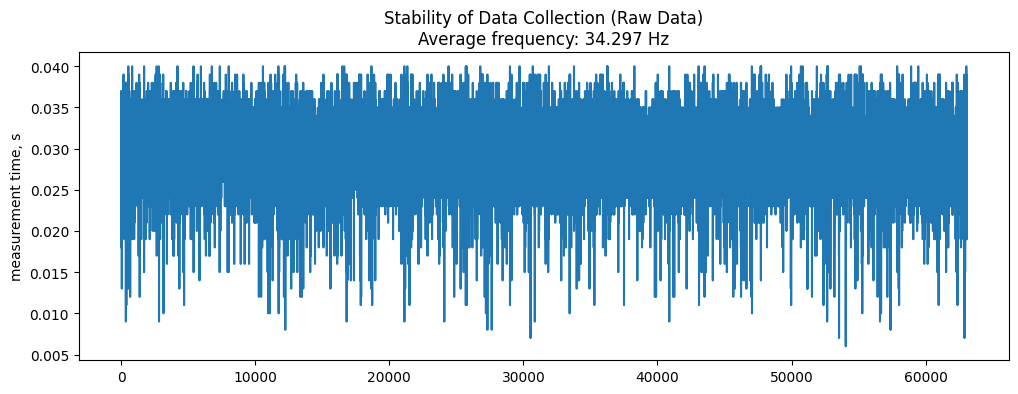

In [41]:
plt.figure(figsize=(12, 4))
plt.title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
plt.ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.04]['measurement_time'])), 
             y=time_measurement_df[time_measurement_df['measurement_time'] <= 0.04]['measurement_time'])
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

## Data Filtering

### Display data before filtering

In [ ]:
display_three_axes(df=df, x='time', y=['accX', 'accY', 'accZ'], title='Time Dependence of Linear Acceleration (Raw Data)', 
                   x_label='Time, s', y_label='Linear acceleration, m/s^2')
display_three_axes(df=df, x='time', y=['gyrX', 'gyrY', 'gyrZ'], title='Time Dependence of Angular Velocity (Raw Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s')

### Display data after filtering

In [ ]:
window_size = 10  # Define the size of the median window

# Apply median filtering to accelerometer data
df['accX_filtered'] = df['accX'].rolling(window=window_size, center=True, min_periods=1).median()
df['accY_filtered'] = df['accY'].rolling(window=window_size, center=True, min_periods=1).median()
df['accZ_filtered'] = df['accZ'].rolling(window=window_size, center=True, min_periods=1).median()

# Apply median filtering to gyroscope data
df['gyrX_filtered'] = df['gyrX'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrY_filtered'] = df['gyrY'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrZ_filtered'] = df['gyrZ'].rolling(window=window_size, center=True, min_periods=1).median()

df.head(3)

In [ ]:
display_three_axes(df=df, x='time', y=['accX_filtered', 'accY_filtered', 'accZ_filtered'], title='Time Dependence of Linear Acceleration (Filtered Data)', 
                x_label='Time, s', y_label='Linear acceleration, m/s^2')
display_three_axes(df=df, x='time', y=['gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered'], title='Time Dependence of Angular Velocity (Filtered Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s')

### Consider the implications of data filtering

#### Display the results of filtering for accelerometer and gyroscope

##### Zoom accelerometer graphs to better see the results of filtering

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accX', 'accX_filtered'], x_lims=[14, 20], y_lims=[-1.5, 1.5],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accY', 'accY_filtered'], x_lims=[14, 20], y_lims=[-3, 3],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accZ', 'accZ_filtered'], x_lims=[14, 20], y_lims=[4, 20],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.30, 0.65, 0.15, 0.15])

##### Zoom gyroscope graphs to better see the results of filtering

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrX', 'gyrX_filtered'], x_lims=[14, 20], y_lims = [-0.6, 1],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrY', 'gyrY_filtered'], x_lims=[14, 20], y_lims = [-0.6, 0.75],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.20, 0.50, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrZ', 'gyrZ_filtered'], x_lims=[14, 20], y_lims = [-1, 1.2],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

## Exploratory Data Analysis

### Analyzing class label distribution

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

In [ ]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

#### Remove 'No activity' class ('activity' column) from df 

In [ ]:
df.info()

In [ ]:
df = df[df['activity'] != 'No activity']
df.info()

In [ ]:
plt.rcdefaults()
sns.set_style('whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

In [ ]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

In [ ]:
len(undersampled_df[undersampled_df['activity'] == 'Walk'])

### Perform undersampling to get a balanced dataframe

In [ ]:
# First, calculate the minimum number of samples across all classes
min_samples = df['activity'].value_counts().min()


# Initialize an empty DataFrame to store the undersampled data
undersampled_df = pd.DataFrame()

# Loop through each unique activity class and select the first min_samples for each class
for activity_class in df['activity'].unique():
    class_subset = df[df['activity'] == activity_class].iloc[:min_samples]
    undersampled_df = pd.concat([undersampled_df, class_subset])

undersampled_df.head()

In [ ]:
undersampled_df.info()

#### View the labels distribution after undersampling

In [ ]:
plt.rcdefaults()
sns.set_style('whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=undersampled_df, x='activity')
plt.title('Number of samples by activity')
plt.show()

In [ ]:
display_pie_chart(df=undersampled_df, column_name='activity', title='Class label distribution')

# Work with test data

In [43]:
test_df = pd.read_csv('data/40_Hz/concatenated_data/All/Test_activities_1_2023-08-23.csv')
test_df.head()

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity
0,1692513112541,0.000,0.18195,-0.01395,9.904051,0.024200,0.000550,-0.067650,No activity
1,1692513112574,0.033,0.18495,0.09000,9.717000,0.009487,-0.031213,0.028325,No activity
2,1692513112599,0.058,0.18495,0.14505,9.745951,-0.002475,-0.047575,0.090338,No activity
3,1692513112631,0.090,0.14400,0.13605,9.772051,0.003438,-0.046887,0.097488,No activity
4,1692513112660,0.119,0.17505,0.06195,10.002001,0.017600,-0.039600,0.078238,No activity


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  12557 non-null  int64  
 1   time       12557 non-null  float64
 2   accX       12557 non-null  float64
 3   accY       12557 non-null  float64
 4   accZ       12557 non-null  float64
 5   gyrX       12557 non-null  float64
 6   gyrY       12557 non-null  float64
 7   gyrZ       12557 non-null  float64
 8   activity   12557 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 883.0+ KB


## Exploring measurement period and frequency stability

In [45]:
time_diffs = test_df['time'].diff()
freq = 1.0 / time_diffs.mean()
print(f"Measurement time = {test_df.iloc[-1]['time'] - test_df.iloc[0]['time']} s")
print(f"Number of measurements (number of rows in the data set) = {len(test_df)}")
print(f"Average measurement period = {time_diffs.mean():.3f} s")
print(f"Average frequency of measurement = {freq:.3f} Hz")

Measurement time = 365.243 s
Number of measurements (number of rows in the data set) = 12557
Average measurement period = 0.029 s
Average frequency of measurement = 34.377 Hz


In [46]:
time_measurement_df = get_measurement_time_df(test_df)
time_measurement_df.head()

,start_time,end_time,measurement_time
0,0.000,0.033,0.033
1,0.033,0.058,0.025
2,0.058,0.090,0.032
3,0.090,0.119,0.029
4,0.119,0.146,0.027


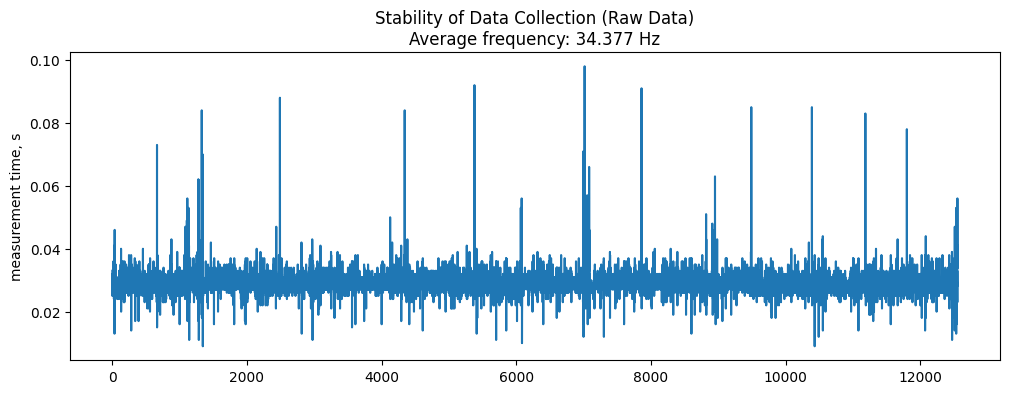

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
ax.set_ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df['measurement_time'])), 
             y=time_measurement_df['measurement_time'])
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

In [49]:
len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.040])

12472

In [52]:
len(test_df[test_df['time'].diff() > 0.040])

84